In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Documents/AgInjuryNews - cleaned.csv')

X = pd.DataFrame(dataset.iloc[:,0:14].values)
Y = pd.DataFrame(dataset.iloc[:,14:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

     0   1   2   3   4   5   6   7   8   9   10  11  12  13
0     1   3   1  79   7   0   0   0   0   0   0   0   0   0
1     3   2   1  84   6   0   0   0   0   0   0   0   0   0
2     3   1   1  87   7   0   0   0   0   0   0   0   0   0
3     3   2   2  65   7   0   0   0   0   0   0   0   0   0
4     3   1   1  63   7   0   0   0   0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
966   1   3   1  63   1   0   0   0   0   0   0   0   0   0
967   1   2   1  64   7   0   0   0   0   0   0   0   0   0
968   1   2   1  85   6   0   0   0   0   0   0   0   0   0
969   3   3   1  77   7   0   0   1   0   0   0   0   0   0
970   1   2   1  64   7   0   0   0   0   0   0   0   0   0

[971 rows x 14 columns]
     0
0    1
1    1
2    1
3    0
4    1
..  ..
966  1
967  1
968  1
969  1
970  1

[971 rows x 1 columns]
(776, 14)
(776, 1)


In [2]:
features = pd.DataFrame(dataset.iloc[:,0:14])
features = features.columns
print(features)

Index(['Location ', 'Time ', 'Sex', 'Age', 'Injury_Agent', 'Confined Space',
       'Grain Involved', 'Drowning/Suffocation', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet', 'ROPS', 'Agritourism', 'Other PPE'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMClassifier 

2024-07-12 08:56:40.795606: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
model = LGBMClassifier()
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 596, number of negative: 180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 776, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.768041 -> initscore=1.197284
[LightGBM] [Info] Start training from score 1.197284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier()

In [5]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1]
     0
132  0
356  1
358  1
941  1
360  1
..  ..
282  1
88   1
682  0
170  0
410  0

[195 rows x 1 columns]
0.7128205128205128
              precision    recall  f1-score   support

           0   0.375000  0.115385  0.176471        52
           1   0.743017  0.930070  0.826087       143

    accuracy                       0.712821       195
   macro avg   0.559008  0.522727  0.501279       195
weighted avg   0.644879  0.712821  0.652856       195



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


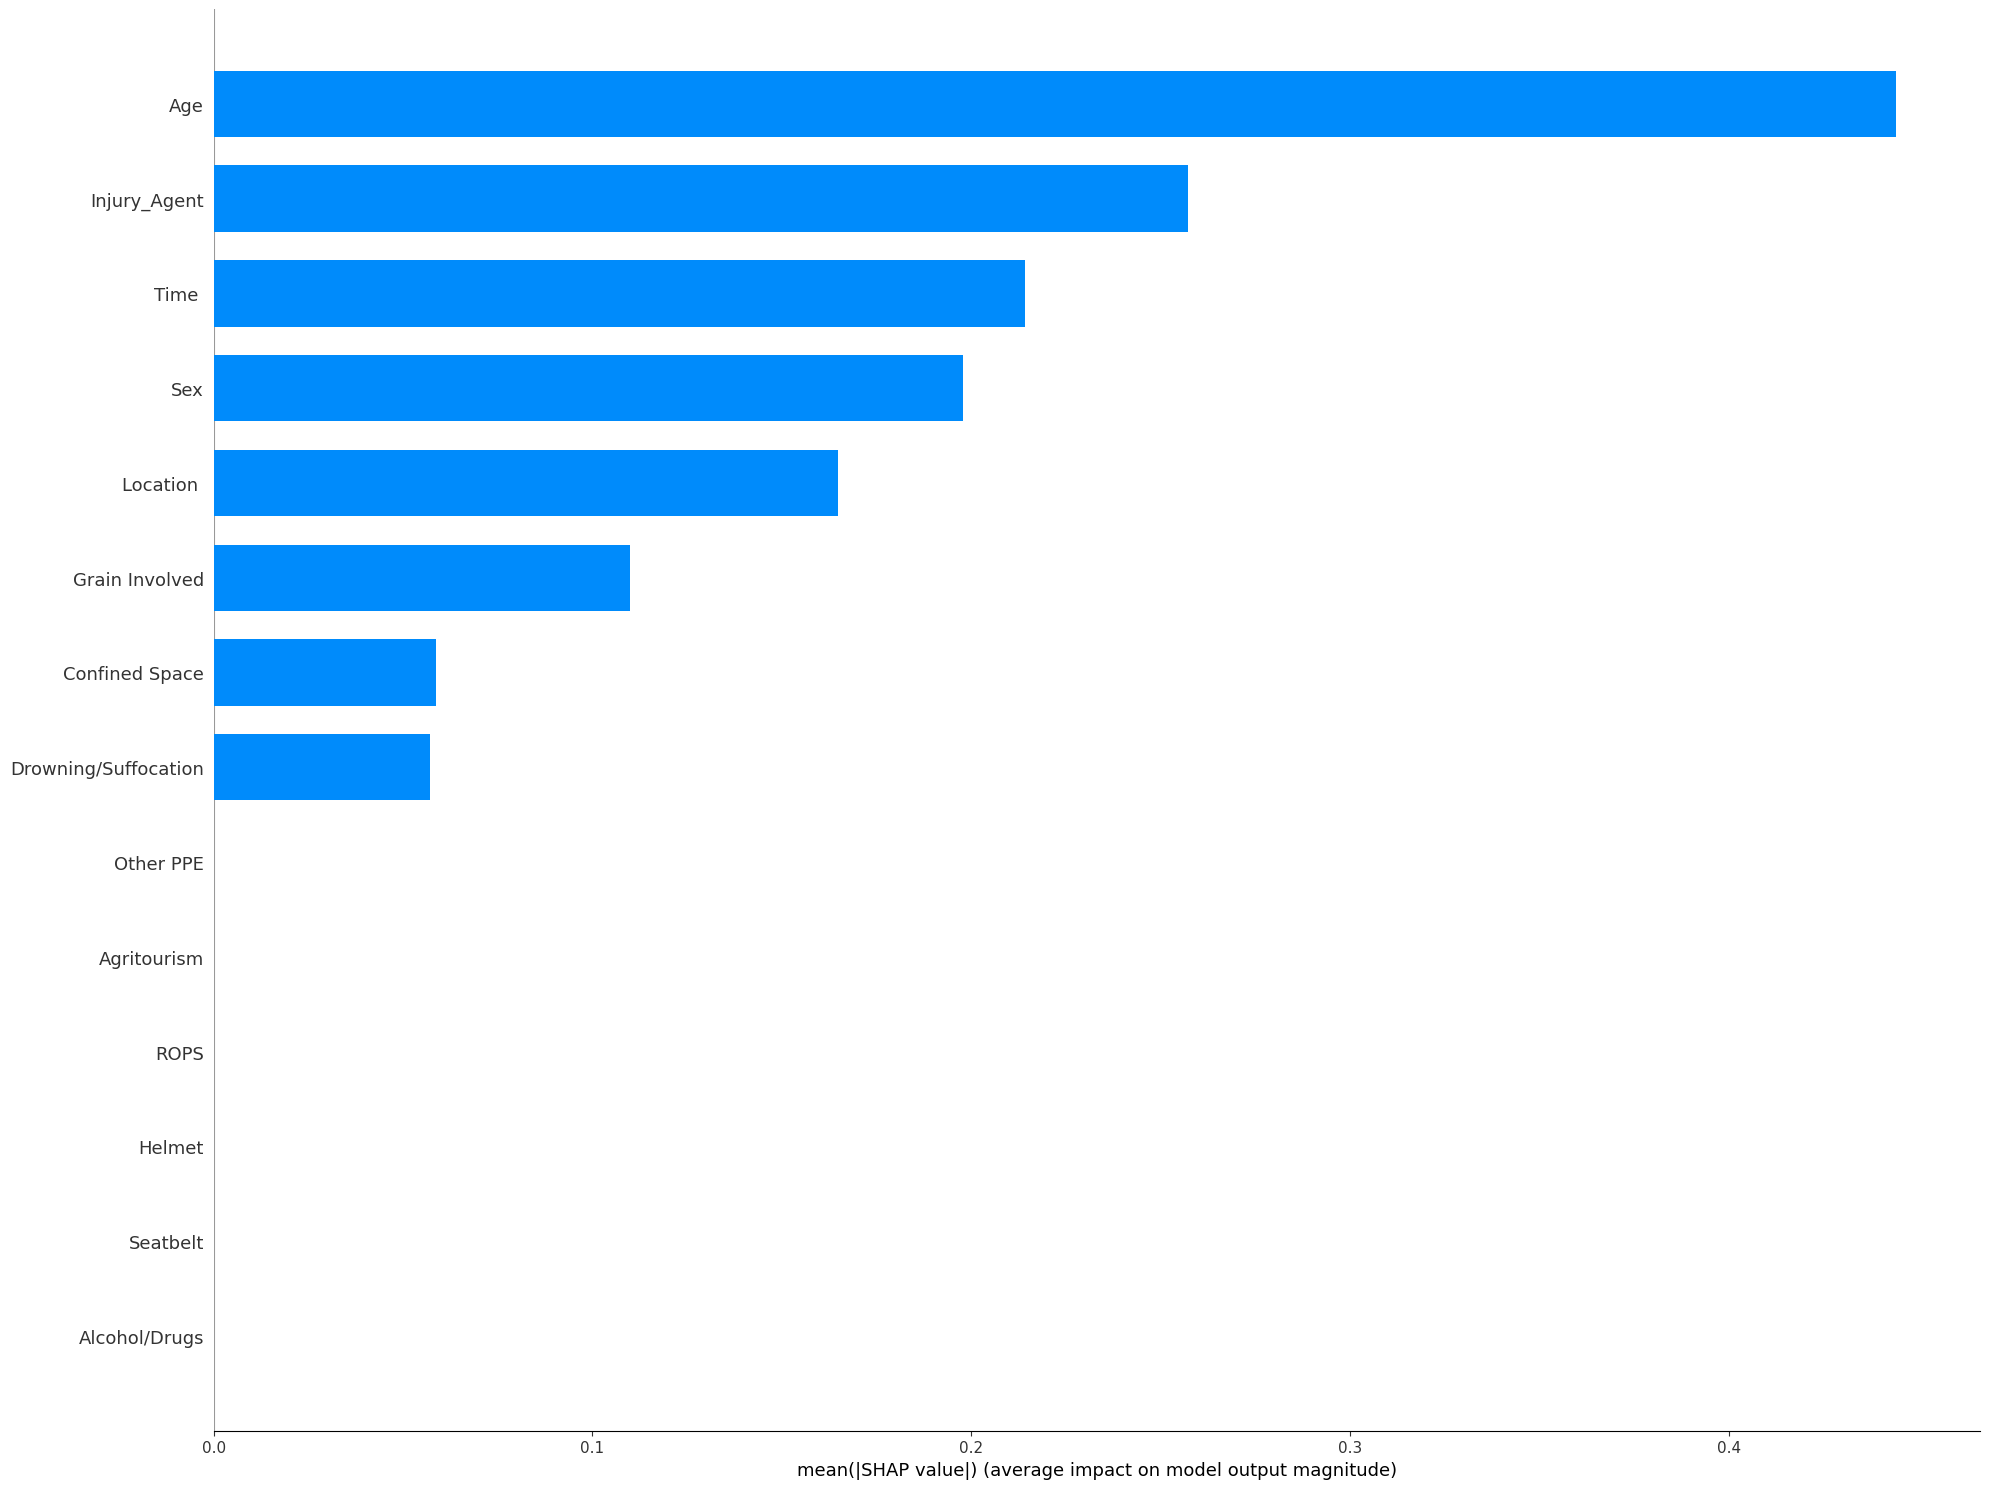

In [6]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)